# <p style="text-align: center;">Grow Intern</p>
# <p style="text-align: center;">Author : <b>Tajeddine Bourhim</b></p>
## <p style="text-align: center;">Task 2 : <b>🚗 Car Price Prediction</b></p>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle


## Read data from CSV file

In [70]:
df = pd.read_csv('CarsData.csv')

## Display the number of cars manufactured each year

In [71]:
num_types = df.groupby(by='year').size();
print(num_types);

year
1970        2
1996        2
1997        4
1998        8
1999        6
2000        9
2001       20
2002       31
2003       34
2004       52
2005       69
2006       86
2007      163
2008      199
2009      277
2010      340
2011      432
2012      633
2013     2590
2014     4053
2015     7586
2016    15724
2017    21616
2018    13570
2019    26165
2020     4040
2024        1
dtype: int64


## Bar graph showing the number of cars by manufacturing year

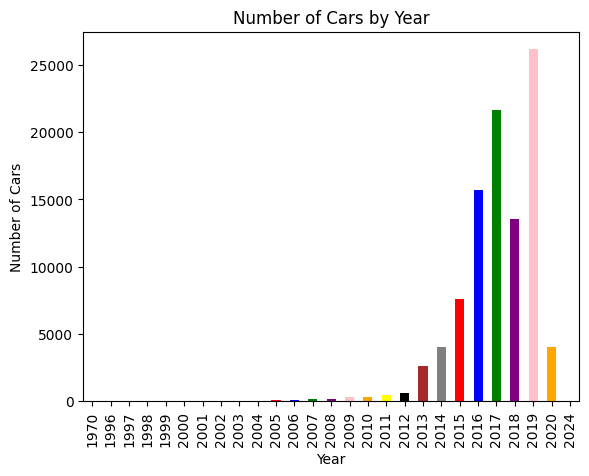

In [72]:
plot = num_types.plot.bar(color=['red', 'blue', 'green', 'purple', 'pink', 'orange', 'yellow', 'black', 'brown', 'grey'])
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Year')
plt.show()

## Scatterplot of car prices vs. mileage, color-coded by year

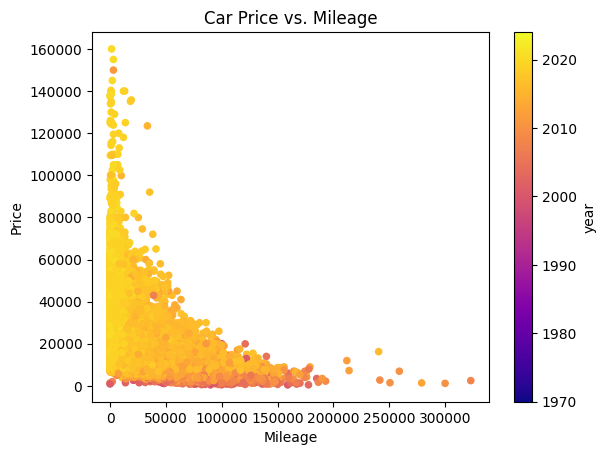

In [73]:
df.plot.scatter(x='mileage', y='price', c='year', cmap='plasma')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Car Price vs. Mileage')
plt.show()

## Mean, Median, and Mode of car prices

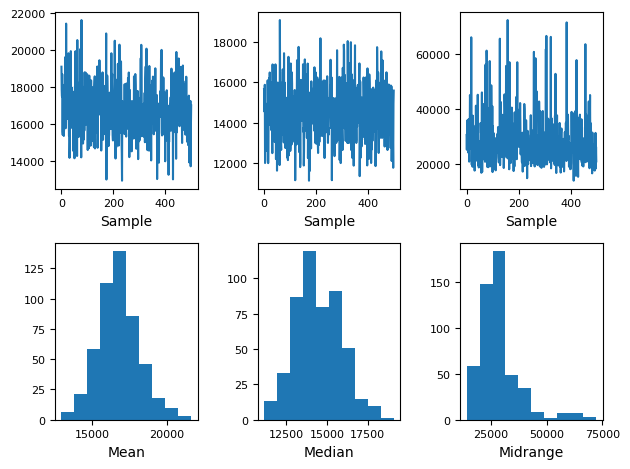

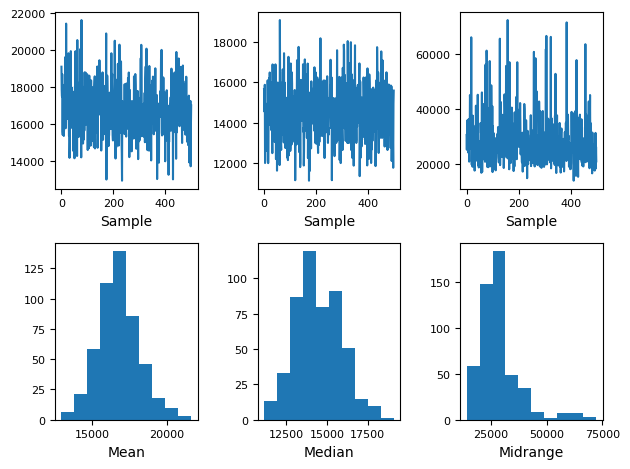

In [74]:
pd.plotting.bootstrap_plot(df['price'])

## Scatter matrix to explore data relationships for variables used in the prediction model

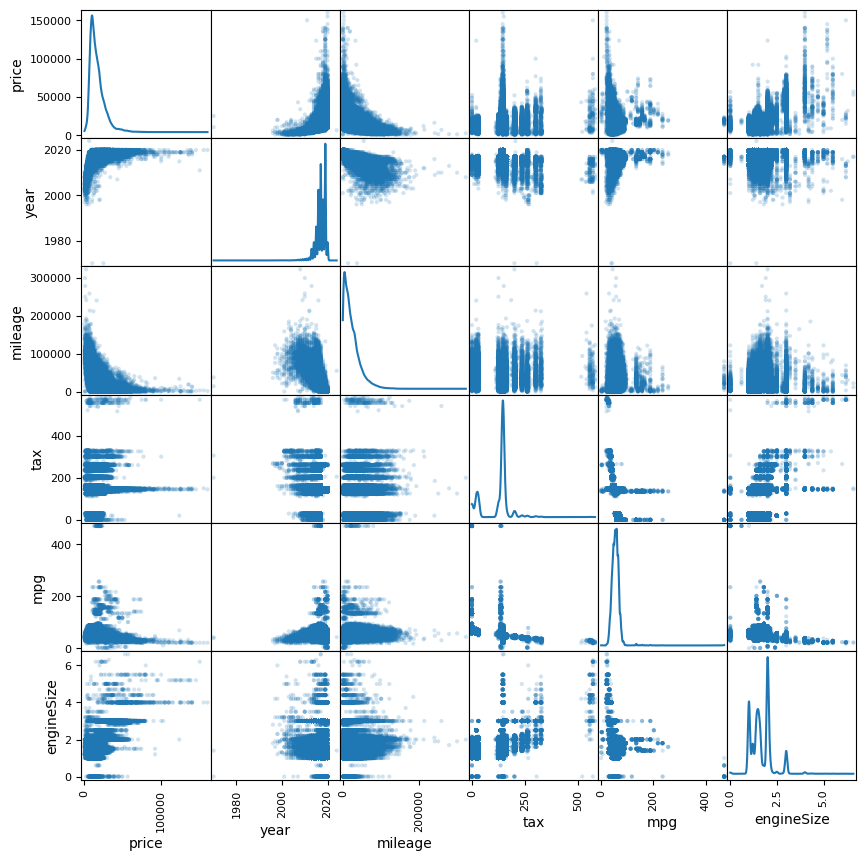

In [75]:
pd.plotting.scatter_matrix(df[['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

## Display the data types of each column

In [76]:
print(df.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
Manufacturer     object
dtype: object


## Data Preperation

Checking if there are any null values in the data.

In [77]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

## Define dependent and independent variables

#### (X) Independent variables: year, mileage, tax, mpg, engine size, transmission, fuel type, manufacturer  
#### (y) Dependent variable: price


In [78]:
feature_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission', 'fuelType', 'Manufacturer']
X = df[feature_columns]
y = df[['price']]


## Preprocessing and model pipeline

In [79]:
from sklearn.compose import ColumnTransformer
# One-hot encode categorical variables
categorical_features = ['transmission', 'fuelType', 'Manufacturer']
preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), ['year', 'mileage', 'tax', 'mpg', 'engineSize']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


## Split data into training and testing sets.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

In [81]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage', 'tax',
                                                   'mpg', 'engineSize']),
                                                 ('cat', OneHotEncoder(),
                                                  ['transmission', 'fuelType',
                                                   'Manufacturer'])])),
                ('model', LinearRegression())])

# Make Your Prediction!!

#### Enter the car values in the order of year, mileage, tax, mpg, engine size, transmission, fuel type, and manufacturer in the `car_values_entered` variable. The model will predict the car's price based on these inputs.


In [82]:
car_values_entered = [2010, 50000, 100, 50, 2, 'Automatic', 'Petrol', 'toyota']

input_df = pd.DataFrame([car_values_entered],columns = feature_columns)

print("Predicted price:", pipeline.predict(input_df)[0][0])

Predicted price: 5252.0


## Accuracy Analysis.

Measure deviation of prediction to actual values.

## Mean Absolute Error

In [83]:
y_pred = pipeline.predict(X_test)

In [84]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2973.818617658809


In [85]:
print("R^2 Score:", metrics.r2_score(y_test, y_pred))

R^2 Score: 0.7611090005553912


## Mean Squared Error for Multivariable Regression

In [86]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 23962279.73213682


## Margin of Error 

Error based on the measures success within a 5,400 price range at an accuracy of 80%.

In [87]:
def percent_within_moe(actual, predict, margin):
    actual = np.array(actual).flatten()
    predict = np.array(predict).flatten()

    total_correct = np.sum(np.abs(actual - predict) < margin)
    return total_correct / len(actual)

print("Percent within margin of error (5400):", percent_within_moe(y_test['price'], y_pred, 5400))

Percent within margin of error (5400): 0.8739973570177325


## Export the trained model

In [88]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model has been exported to model.pkl")

Model has been exported to model.pkl
